In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fruits = np.load('data/fruits_300.npy')
fruits.shape

(300, 100, 100)

In [3]:
fruits_10000 = fruits.reshape(-1, 100 * 100)
fruits_10000.shape

(300, 10000)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_10000)

print(pca.components_.shape)

(50, 10000)


In [5]:
# User-defined Function

def DrawFruits(arr_samplecnt_100_100, ratio=1):
    
    sample_cnt = len(arr_samplecnt_100_100)
    row_cnt = int(np.ceil(sample_cnt / 10))
    
    if row_cnt < 2:
        col_cnt = sample_cnt
    else:
        col_cnt = 10
        
    fig, axes = plt.subplots(row_cnt, col_cnt, figsize=(col_cnt * ratio, row_cnt * ratio), squeeze=False)
    
    for iRow in range(row_cnt):
        for iCol in range(col_cnt):
            if iRow * 10 + iCol < sample_cnt:
                axes[iRow, iCol].imshow(arr_samplecnt_100_100[iRow * 10 + iCol], cmap='gray_r')
            axes[iRow, iCol].axis('off')
            
    plt.show()

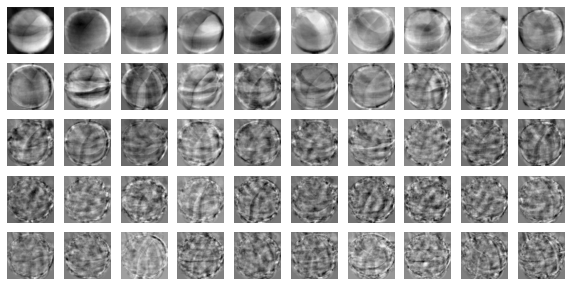

In [6]:
DrawFruits(pca.components_.reshape(-1, 100, 100))

In [7]:
print(fruits_10000.shape)
fruits_pca = pca.transform(fruits_10000)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


### Inverse Transform

In [8]:
fruits_inverse_10000 = pca.inverse_transform(fruits_pca)
print(fruits_inverse_10000.shape)

(300, 10000)


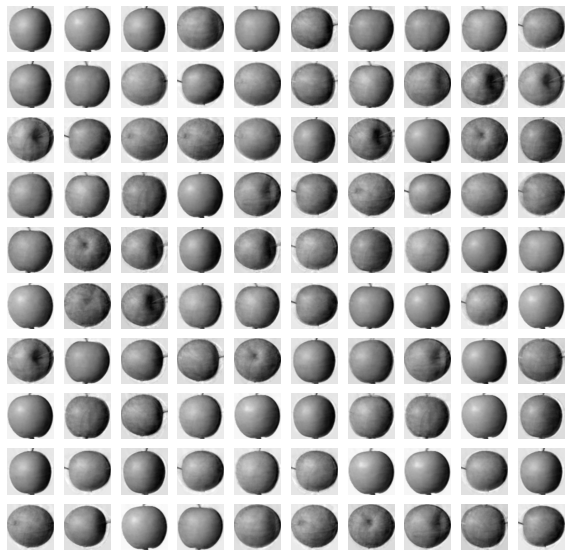

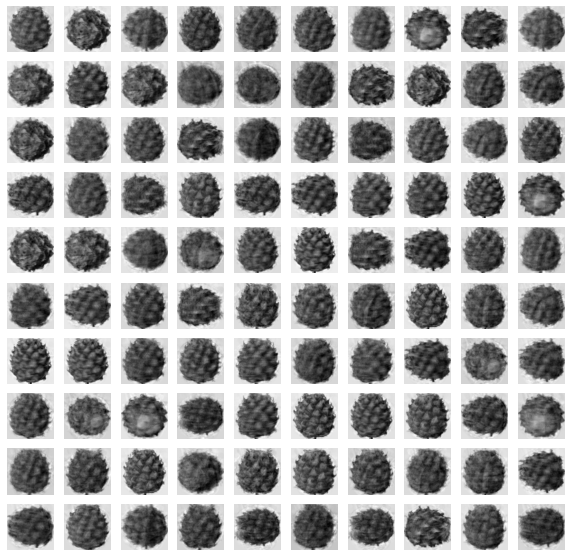

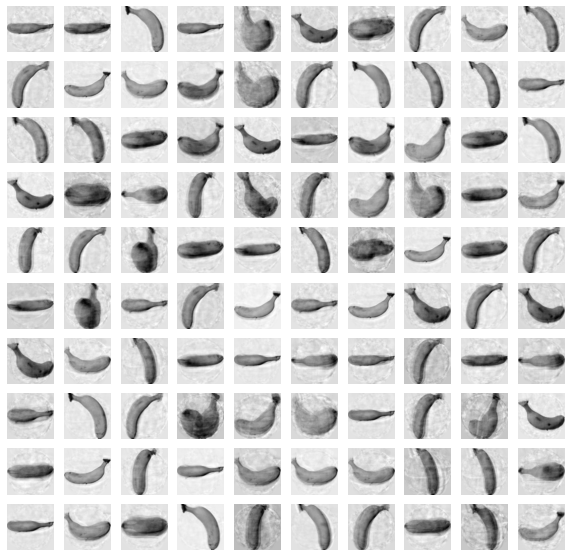

In [9]:
fruits_inverse = fruits_inverse_10000.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    DrawFruits(fruits_inverse[start : start + 100])
    print('\n')

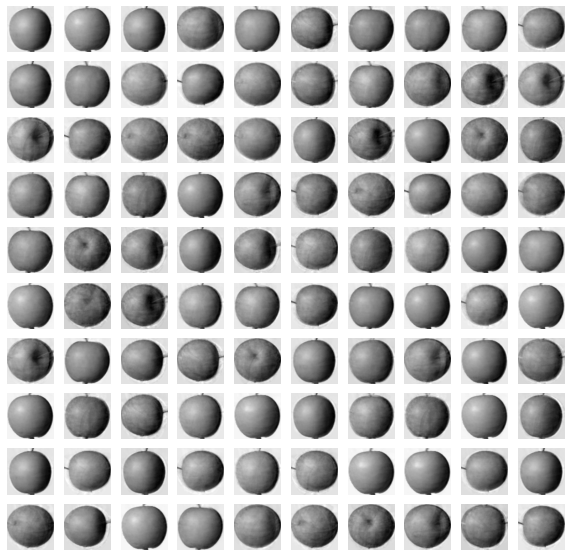

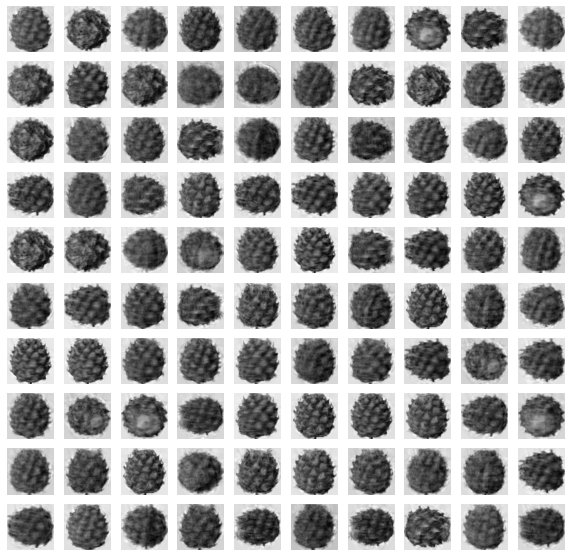

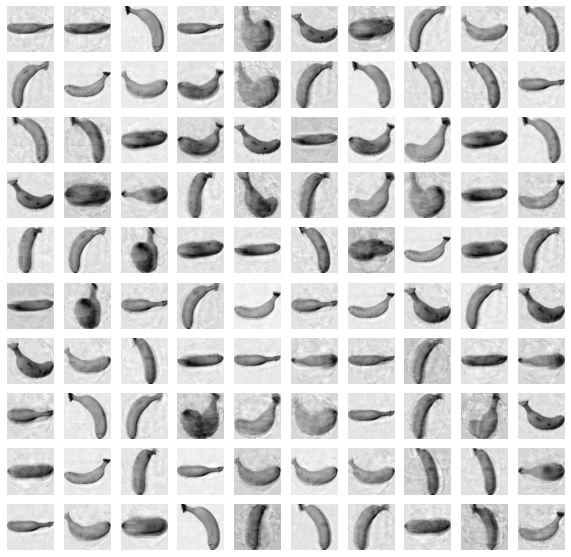

In [10]:
fruits_inverse = fruits_inverse_10000.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    DrawFruits(fruits_inverse[start : start + 100])
    print('\n')

### Explained Variance

In [10]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511201, 0.00486381, 0.00480346,
       0.00447836, 0.00437316, 0.00408033, 0.00389479, 0.00372437,
       0.00359215, 0.00331424, 0.00317837, 0.00304325, 0.00303647,
       0.00288923, 0.00275775, 0.00264983, 0.00255942, 0.00251527,
       0.00247046, 0.00238944, 0.00230616, 0.00222155, 0.00216825,
       0.00213622, 0.00195969, 0.00192103, 0.00189326, 0.00184424,
       0.00181931, 0.00174098, 0.00168474, 0.00162036, 0.00161434])

In [11]:
print(np.sum(pca.explained_variance_ratio_))

0.9215372438701596


''

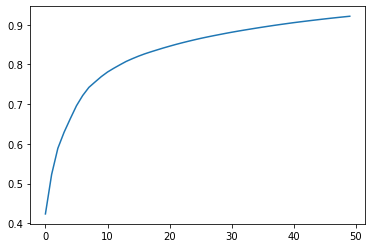

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
;

### PCA with Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [16]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

from sklearn.model_selection import cross_validate

result = cross_validate(lr, fruits_10000, target)
result_df = pd.DataFrame(result)
result_df

,fit_time,score_time,test_score
0,0.546079,0.002994,1.000000
1,0.498806,0.001986,1.000000
2,0.535159,0.001995,1.000000
3,0.459805,0.002994,0.983333
4,0.540521,0.001996,1.000000


In [17]:
print(result_df['test_score'].mean())
print(result_df['fit_time'].mean())

0.9966666666666667
0.5160739898681641


In [19]:
result = cross_validate(lr, fruits_pca, target)
result_df = pd.DataFrame(result)
result_df

print(result_df['test_score'].mean())
print(result_df['fit_time'].mean())

1.0
0.03461356163024902


In [20]:
pca = PCA(n_components=0.5)
pca.fit(fruits_10000)

PCA(n_components=0.5)

In [21]:
print(pca.n_components_)

2


In [22]:
fruits_pca = pca.transform(fruits_10000)
print(fruits_pca.shape)

(300, 2)


In [23]:
result = cross_validate(lr, fruits_pca, target)
result_df = pd.DataFrame(result)
result_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,fit_time,score_time,test_score
0,0.070670,0.001348,0.966667
1,0.034430,0.000000,1.000000
2,0.035904,0.000736,1.000000
3,0.019947,0.000000,0.983333
4,0.038896,0.000287,1.000000


In [24]:
print(result_df['test_score'].mean())
print(result_df['fit_time'].mean())

0.99
0.039969253540039065


In [31]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=1234)
km.fit(fruits_pca)

label_list, cnt_list = np.unique(km.labels_, return_counts=True)

for label, cnt in zip(label_list, cnt_list):
    print(str(label) + ': ' + str(cnt))

0: 99
1: 91
2: 110


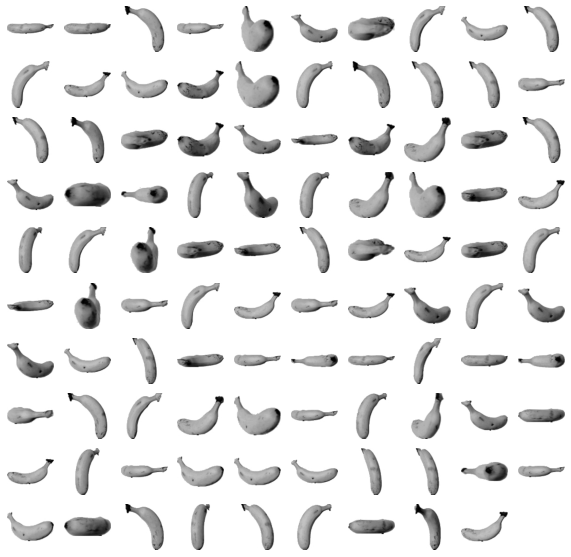

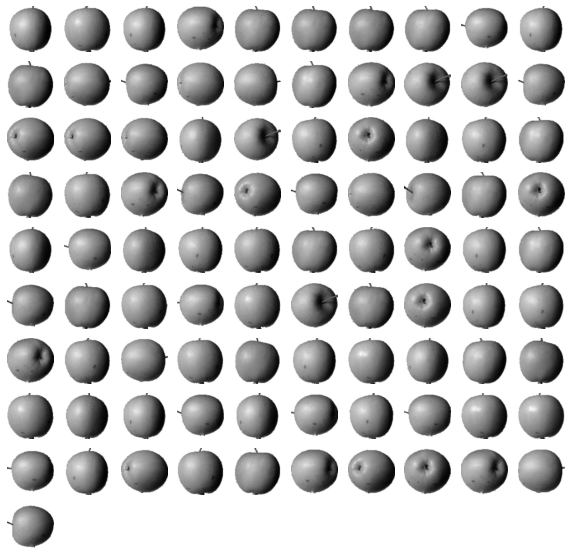

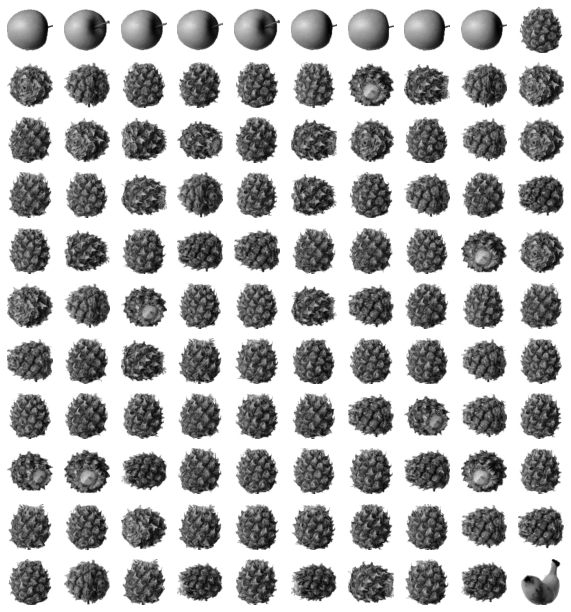

In [32]:
for iTarget in range(3):
    DrawFruits(fruits[km.labels_ == iTarget])
    print('\n')

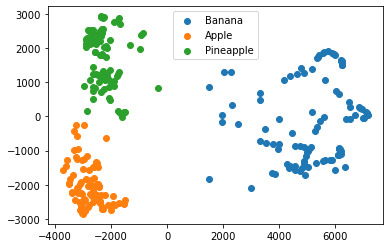

''

In [34]:
for iTarget in range(3):
    data = fruits_pca[km.labels_ == iTarget]
    plt.scatter(data[:, 0], data[:, 1])

plt.legend(['Banana', 'Apple', 'Pineapple'])
plt.show()
;